In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris=datasets.load_iris()

In [3]:
X=iris.data[:,[2,3]]
y=iris.target

In [4]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [8]:
print(X_train.shape)
print(X_test.shape)

(105, 2)
(45, 2)


In [9]:
X_train[0]

array([3.5, 1. ])

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [11]:
X_train_std[0]

array([-0.18295039, -0.29318114])

In [12]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
y_pred=ppn.predict(X_test_std)

In [14]:
print('Misclassified samples: %d' %(y_test!=y_pred).sum())

Misclassified samples: 5


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print('Accuracy: %2f '% accuracy_score(y_test,y_pred))

Accuracy: 0.888889 


In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [18]:
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    markers=('s','x','o','*','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    #plot decision surfaces
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    #plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
       
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='black',alpha=1.0, linewidth=1, marker='o',s=55, label='test set')


In [19]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


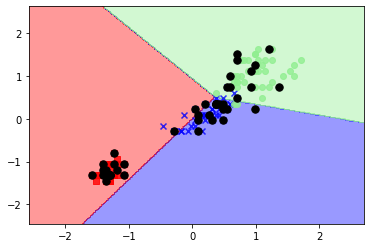

In [20]:
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))

In [21]:
from sklearn.linear_model import LogisticRegression

Logistic Regression

In [22]:
lr=LogisticRegression(C=1000,random_state=0)
lr.fit(X_train_std,y_train)

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred=lr.predict(X_test_std)
print(accuracy_score(y_test,y_pred))

0.9777777777777777


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


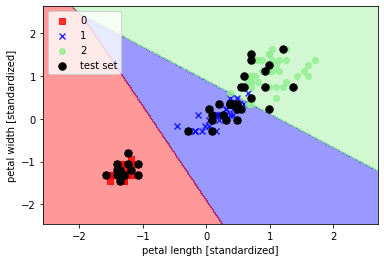

In [24]:
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\imayu\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

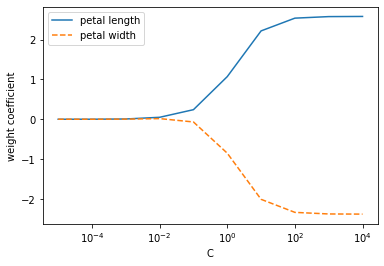

In [25]:
import math
weights, params=[],[]
for c in np.arange(-5,5):
    lr=LogisticRegression(C=math.pow(10,c),random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(math.pow(10,c))

weights=np.array(weights)
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],label='petal width',linestyle='--')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

Support Vector Machine

In [26]:
from sklearn.svm import SVC


In [27]:
svm_lin=SVC(kernel='linear',C=100,random_state=0)
svm_lin.fit(X_train_std,y_train)
y_pred=svm_lin.predict(X_test_std)

In [28]:
accuracy_score(y_test,y_pred)

0.9777777777777777

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


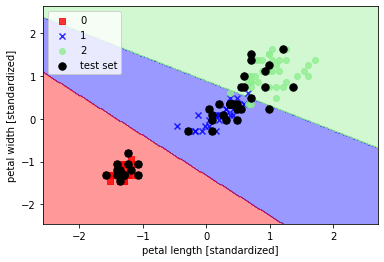

In [29]:
plot_decision_regions(X_combined_std,y_combined,classifier=svm_lin,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Solving Non-Linear Problems using a kernel SVM

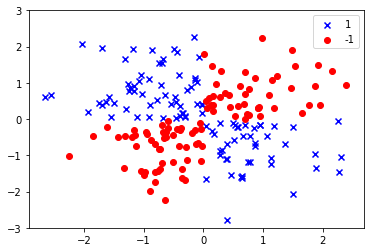

In [30]:
np.random.seed(0)
X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor=np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1],c='r',marker='o',label='-1')
plt.ylim(-3,3)
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


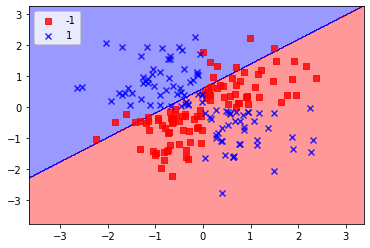

In [31]:
svm=SVC(kernel='linear',random_state=0,gamma=0.10,C=10)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


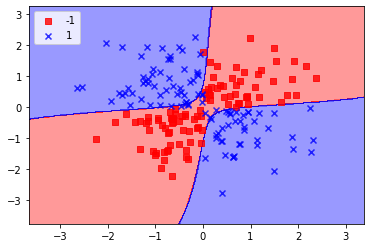

In [32]:
svm=SVC(kernel='rbf',random_state=0,gamma=0.10,C=10)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()

In [33]:
svm_lin=SVC(kernel='rbf',C=1,random_state=0,gamma=10)
svm_lin.fit(X_train_std,y_train)
y_pred=svm_lin.predict(X_test_std)
accuracy_score(y_test,y_pred)

1.0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


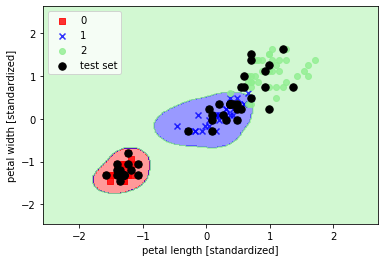

In [34]:
plot_decision_regions(X_combined_std,y_combined,classifier=svm_lin,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [35]:
array=[1,0]
array=np.asarray(array)
print(svm_lin.predict(array.reshape(1,-1)))


[2]


DecisionTrees and RandomForest

0.9777777777777777


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


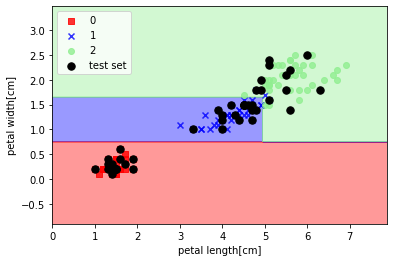

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
print(accuracy_score(y_test,y_pred))
X_combined=np.vstack((X_train,X_test))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='entropy',
                            n_estimators=10,
                            random_state=1,
                            n_jobs=2)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9555555555555556


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


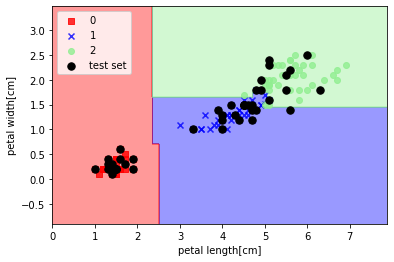

In [60]:
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='upper left')
plt.show()

Non-Parametric Methods: K-Nearest Neighbour

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn=KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std,y_train)
y_pred=knn.predict(X_test_std)
print(accuracy_score(y_test,y_pred))

1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


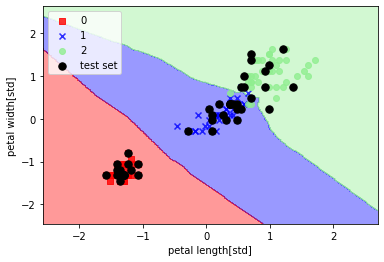

In [64]:
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length[std]')
plt.ylabel('petal width[std]')
plt.legend(loc='upper left')
plt.show()